# Trabalho Final - Parte 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Gráficos comuns
import plotly.express as px # Gráficos interativos

import folium # Gráficos interativos com mapas
from folium.plugins import HeatMap # Heatmap
from IPython.display import HTML
import seaborn as sns # Gráficos estatísticos e análise

# Regressão Linear
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


import warnings # Ignora avisos
warnings.filterwarnings("ignore")

## 1- Leitura dos dados

In [ ]:
# carregando os dados
df = pd.read_csv('Roma.csv')

print('Tamanho do dataset: ', df.shape)
df.head()

Tamanho do dataset:  (34542, 18)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,1211500232171693714,La Quercia Nera - Trastevere - Centro di Roma,590573096,Mario,NaN,XII Monte Verde,41.875124,12.466063,Private room,81.0,1,5,2025-02-25,3.13,5,258,5,IT058091C2P495DNNK
1,1211508050662517878,The Black Tower - Trastevere - Center of Rome,590573096,Mario,NaN,XII Monte Verde,41.875124,12.466063,Private room,71.0,1,9,2025-03-02,2.06,5,237,9,IT058091C2P495DNNK
2,1211521201915387381,Delizioso appartamento luminoso,20600886,Sara,NaN,V Prenestino/Centocelle,41.883484,12.578366,Entire home/apt,174.0,2,1,2025-02-16,1.00,1,108,1,IT058091C2P9VIF34W
3,1211523205937481277,Attico a San Giovanni – 3 minuti dalla metro A,284944258,Roberta,NaN,VII San Giovanni/Cinecittà,41.877496,12.516198,Entire home/apt,107.0,2,4,2024-10-20,0.69,1,300,4,IT058091C22VT9UMI3
4,1211539186530317410,Fresh House Fori Imperiali,28700626,Riccardo,NaN,I Centro Storico,41.892137,12.488069,Entire home/apt,222.0,2,4,2024-12-22,0.53,21,82,4,IT058091C2CUFOYSIO


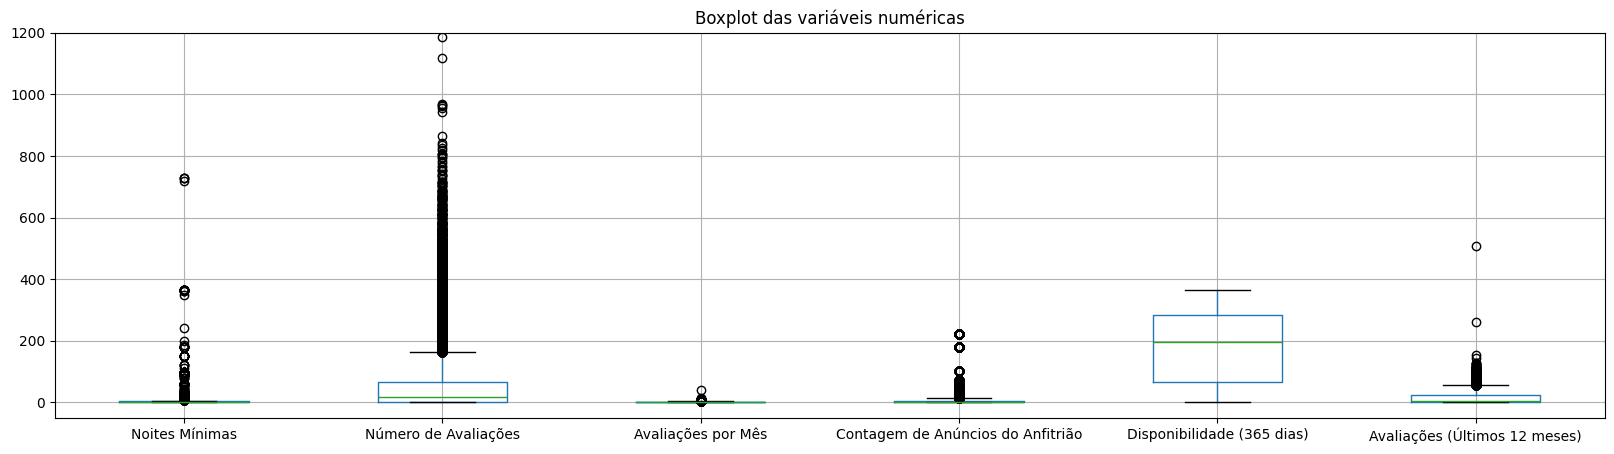

In [ ]:
# Análise inicial das distribuições das variáveis numéricas

# variaveis numericas
variaveis_numericas = df[[ 'minimum_nights',
                       'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
                       'availability_365', 'number_of_reviews_ltm']]

# Cria uma cópia do DataFrame para plotagem
df_para_plot = variaveis_numericas.copy()

# Renomeia as colunas para português para usar no gráfico
df_para_plot.columns = ['Noites Mínimas', 'Número de Avaliações', 'Avaliações por Mês',
                        'Contagem de Anúncios do Anfitrião', 'Disponibilidade (365 dias)',
                        'Avaliações (Últimos 12 meses)']


# Boxplot das variáveis numéricas

df_para_plot.boxplot(figsize = (20, 5))
plt.title('Boxplot das variáveis numéricas')
plt.ylim(-50,1200) # setando o limite do eixo y - Alguns daods outliers não estão sendo exibidos
plt.grid(True)
plt.show()

## 2 - Análise de  Qualidade dos Dados

### Verificando a existência de valores faltantes por coluna

In [ ]:
# verificandos os dados faltantes
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                            19
neighbourhood_group               34542
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              3554
minimum_nights                        0
number_of_reviews                     0
last_review                        5722
reviews_per_month                  5722
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                            3435
dtype: int64

In [ ]:
# podemos observar que a coluna 'neighbourhood_group' não possui dados, iremos excluir a coluna
df.drop(columns=['neighbourhood_group'], inplace=True)

### Todos as linhas possuem IDs únicas, logo não é possível identificar o mesmo imóvel para preenchimento de valores faltantes.
### Logo excluiremos todos as linhas com valores faltantes

In [ ]:
print(f'Número de anúncios no DataFrame : {df.shape[0]}')
print(f'Número de IDs únicos no DataFrame : {df["id"].nunique()}')

# Excluindo os NaNs restantes
df.dropna(axis = 0, inplace = True)

Número de anúncios no DataFrame : 34542
Número de IDs únicos no DataFrame : 34542


### Resumo Estatístico das principais variáveis numéricas

In [ ]:
# variaveis numericas
variaveis_numericas = df[[ 'minimum_nights',
                       'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count',
                       'availability_365', 'number_of_reviews_ltm']]


variaveis_numericas.describe()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,24961.000000,24961.000000,24961.000000,24961.000000,24961.000000,24961.000000
mean,2.474741,71.318056,1.818297,9.587637,184.544730,19.227715
std,6.606998,104.440368,1.577267,26.666929,115.242446,20.531271
min,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,1.000000,7.000000,0.570000,1.000000,88.000000,3.000000
50%,2.000000,30.000000,1.390000,2.000000,200.000000,12.000000
75%,2.000000,91.000000,2.700000,6.000000,281.000000,30.000000
max,730.000000,2583.000000,40.490000,223.000000,365.000000,508.000000


## 3 - Análise Estatística Descritiva dos Preços

In [ ]:
# calculando medidas descritivas para a variável 'price'

# média
media = df['price'].mean()
# mediana
mediana = df['price'].median()
# desvio padrão
desvio_padrao = df['price'].std()
# mínimo
minimo = df['price'].min()
# máximo
maximo = df['price'].max()


print('Medidas descritivas para a variável "price":')
print(f'Média: {media:.2f}')
print(f'Mediana: {mediana:.2f}')
print(f'Desvio padrão: {desvio_padrao:.2f}')
print(f'Mínimo: {minimo:.2f}')
print(f'Máximo: {maximo:.2f}')

Medidas descritivas para a variável "price":
Média: 156.18
Mediana: 111.00
Desvio padrão: 337.10
Mínimo: 15.00
Máximo: 21550.00


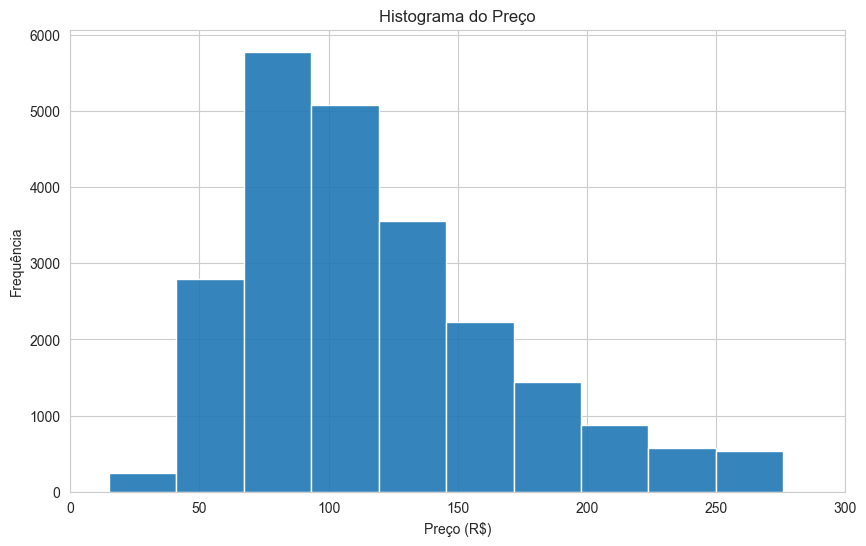

In [ ]:
# Histograma do preço
plt.figure(figsize=(10, 6))
sns.histplot(data = df, x = 'price', bins=10, alpha=0.9)
plt.title('Histograma do Preço')
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')
plt.xlim(0, 300) # Limite do eixo x
plt.show()

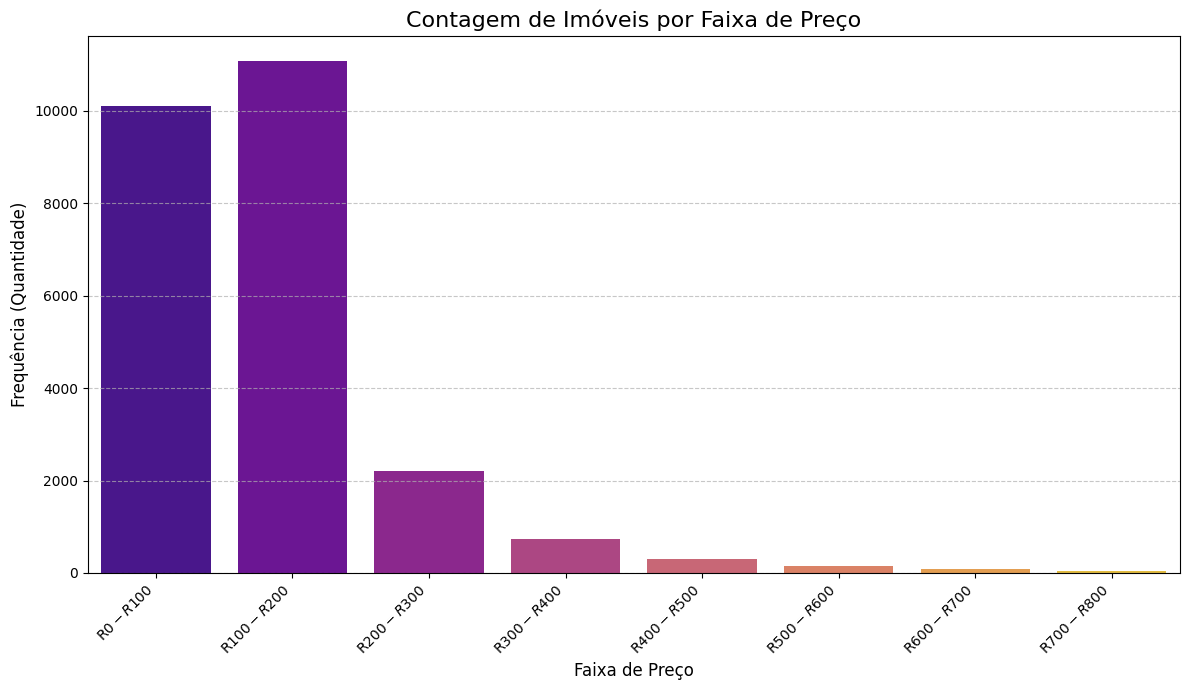

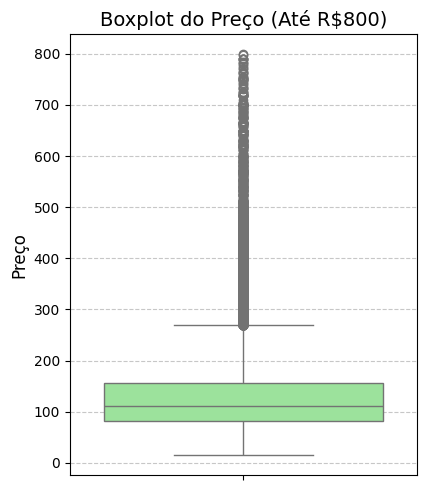

In [ ]:
# Gráfico de Barras do 'price'
df_filtrado = df[df['price'] <= 800].copy()

# Define os intervalos e rótulos para as faixas de preço
faixas = range(0, 801, 100)
rotulos = [f'R${i} - R${i+100}' for i in range(0, 701, 100)]

# Cria a coluna com as faixas de preço
df_filtrado['faixa_preco'] = pd.cut(df_filtrado['price'], bins=faixas, labels=rotulos, right=False)

# Conta os imóveis por faixa e ordena
contagem_por_faixa = df_filtrado['faixa_preco'].value_counts().sort_index()

# Plota o gráfico de barras
plt.figure(figsize=(12, 7))
sns.barplot(x=contagem_por_faixa.index, y=contagem_por_faixa.values, palette='plasma')

# Ajustes e títulos do gráfico
plt.title('Contagem de Imóveis por Faixa de Preço', fontsize=16)
plt.xlabel('Faixa de Preço', fontsize=12)
plt.ylabel('Frequência (Quantidade)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráficos Boxplot para 'price'
plt.figure(figsize=(8, 5))


# Boxplot 2: Preço limitado a R$800
plt.subplot(1, 2, 2)
sns.boxplot(y=df[df['price'] < 800]['price'], color='lightgreen')
plt.title('Boxplot do Preço (Até R$800)', fontsize=14)
plt.ylabel('Preço', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajusta o layout e exibe os gráficos
plt.tight_layout()
plt.show()

### Removendo os outliers do preço

In [ ]:
# Excluindo os OUTLIERS do preço

# Preço máximo
price = 277 # Q3 + 1.5*IQR - Valore considerado como outlier

a = (df['price'] >= price).sum()

media_price = a / df.shape[0]

print(f'A porcentagem de imóveis com preço maior ou igual a R${price} é de {media_price:.2%}, iremos excluir esses imóveis da base de dados por se tratarem de outliers')

# Iremos excluir esses imóveis da base de dados
df = df[df['price'] < price]

A porcentagem de imóveis com preço maior ou igual a R$277 é de 7.56%, iremos excluir esses imóveis da base de dados por se tratarem de outliers


## 4 - Análise de Preço por Bairro

### Preço média por bairro

In [ ]:
# Agrupando os dados por bairro e calculando a média do price
df_bairro = df.groupby('neighbourhood')['price'].mean().round(2)

# ordenado o preço médio por bairro em ordem crescente
df_bairro = df_bairro.sort_values(ascending = True)

df_bairro

neighbourhood
V Prenestino/Centocelle        78.75
VI Roma delle Torri            79.39
X Ostia/Acilia                 85.71
IV Tiburtina                   86.51
III Monte Sacro                89.53
IX Eur                         90.88
XI Arvalia/Portuense           92.01
XIV Monte Mario                95.55
VIII Appia Antica              96.02
XV Cassia/Flaminia             96.56
VII San Giovanni/Cinecittà    100.29
XII Monte Verde               104.92
II Parioli/Nomentano          109.53
XIII Aurelia                  110.84
I Centro Storico              136.52
Name: price, dtype: float64

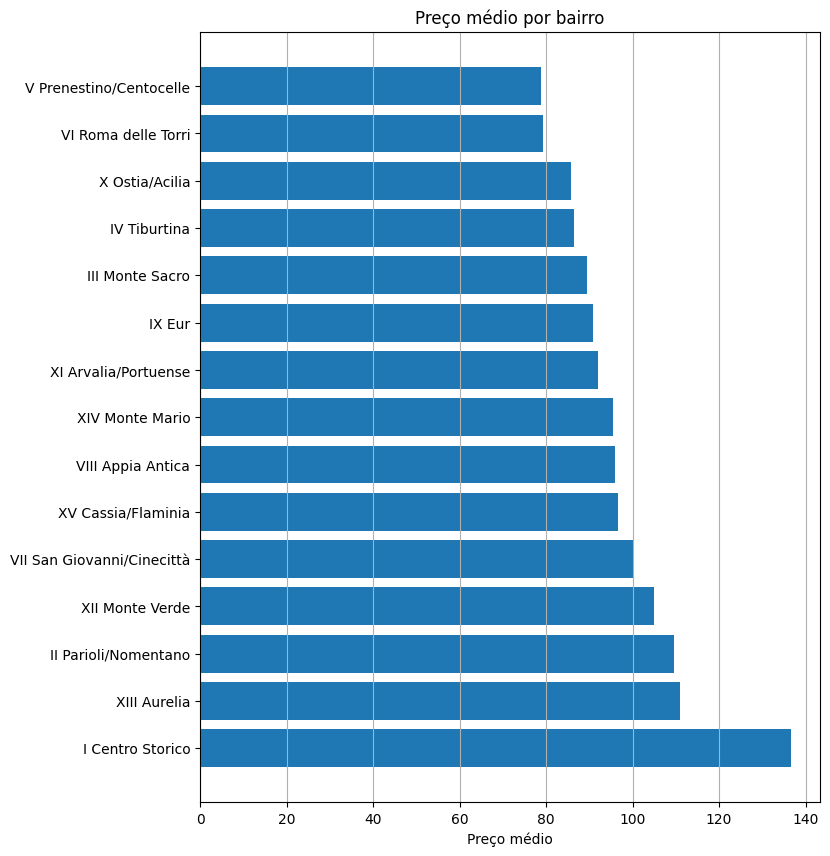

In [ ]:
# Gráfico de barras do preço médio por bairro

df_bairro_ordenado = df_bairro.sort_values(ascending=False)


# 2. Define o tamanho da figura, idealmente mais alta do que larga.
plt.figure(figsize=(8, 10))

# 3. Usa a função plt.barh() para criar as barras na HORIZONTAL.
plt.barh(df_bairro_ordenado.index, df_bairro_ordenado.values)

# 4. INVERTE os títulos dos eixos para corresponder ao novo layout.
plt.title('Preço médio por bairro')
plt.xlabel('Preço médio')


plt.grid(axis='x')


plt.show()

### Além do bairro, outro variável que pode influenciar o preço é o tipo de quarto

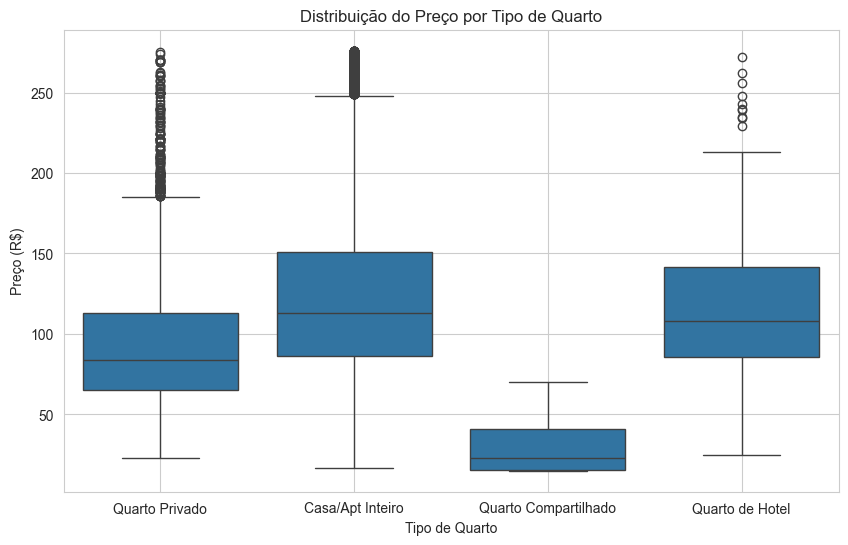

In [ ]:
# Boxplot das variáveis numéricas

mapeamento_quartos = {
    'Entire home/apt': 'Casa/Apt Inteiro',
    'Private room': 'Quarto Privado',
    'Shared room': 'Quarto Compartilhado',
    'Hotel room': 'Quarto de Hotel'  # <-- NOVA ADIÇÃO
}
df['room_type'] = df['room_type'].map(mapeamento_quartos).fillna(df['room_type'])

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.boxplot(data= df, x = 'room_type', y= 'price')


plt.title('Distribuição do Preço por Tipo de Quarto')
plt.xlabel('Tipo de Quarto')
plt.ylabel('Preço (R$)')
plt.grid(True)
plt.show()

## 5 - Visualização Geográfica

In [ ]:
# Diccionário contendo os principais pontos turisticos de Roma e suas respectivas coordenadas e links para imagens
pontos_turisticos = {'Colosseo': [41.89037834838476, 12.492074735114405, 'https://dicasdaitalia.com.br/wp-content/uploads/sites/11/2019/12/coliseu-roma.jpg'], # Coliseu
            'Vaticano': [41.90234957043598, 12.453547356817808, 'https://www.correiobraziliense.com.br/cbradar/wp-content/uploads/2025/04/Vaticano_1745587546131-750x375.jpg'], # Vaticano
            'Foro Romano': [41.89277326790539, 12.486306111056853, 'https://upload.wikimedia.org/wikipedia/commons/5/5a/Forum_Romanum_Rom.jpg'], # foro romano
            'Fontana di Trevi': [41.9009009009009, 12.476518218218218,'https://midias-turismo.eurodicas.com.br/wp-content/uploads/2025/02/fontana-di-trevi-5.jpg.webp'], # fontana di trevi
            'Pantheon': [41.898746557947824, 12.476840713494953,'https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/Rome_Pantheon_front.jpg/960px-Rome_Pantheon_front.jpg'], # pantheon
            'Piazza di Spagna': [41.9009009009009, 12.476518218218218,'https://www.civitatis.com/f/italia/roma/guia/plaza-espana-m.jpg'], # piazza di spagna
            "Castel Sant\'Angelo": [41.90327081520888, 12.466308186505033,'https://dynamic-media.tacdn.com/media/photo-o/2e/a6/4e/ef/caption.jpg?w=700&h=500&s=1'], # castel sant'angelo
            'Piazza Navona': [41.886519625601586, 12.505587101000874,'https://midias-turismo.eurodicas.com.br/wp-content/uploads/2025/02/piazza-navona-1-1-768x512.jpg.webp'], # piazza navona
            'Basilica di San Giovanni in Laterano': [41.886519625601586, 12.505587101000874, 'https://dynamic-media-cdn.tripadvisor.com/media/photo-o/2b/ee/0c/a9/caption.jpg?w=900&h=500&s=1'],
            'Piazza Venezia':[41.89599299724665, 12.482509717734436, 'https://tourismmedia.italia.it/is/image/mitur/20220426101046-vista-di-piazza-venezia-roma-lazio-shutterstock-1729389997-1?wid=850&hei=500&fit=constrain,1&fmt=webp'],
            'Campo de Fiori':[41.8958457954686, 12.472097060459035,'https://dynamic-media-cdn.tripadvisor.com/media/photo-o/13/59/bc/f0/campo-de-fiori-roma-italia.jpg?w=1200&h=1200&s=1'],
            'Termas de Caracalla':[41.879269857879564, 12.49247158650724, 'https://lh3.googleusercontent.com/gps-cs-s/AC9h4npJbhl7u8Kgzi_3T7fC32fH5cjSFBATpkVFuHarZ5cuhCYh1DCgqUJb_DH5F6LKP81fYnXhepY2ljB14WVxsveN--A2eBoxab67tg=w408-h306-k-no'],
            'Circo Massimo':[41.88622554192749, 12.485620112249025, 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTjc3hT7qHuZu1nCOuvuiObk8ZL9FYo_4wnKg&s'],
            'Catacombe di San Callisto':[41.859430652049255, 12.510795200988257, 'https://lh3.googleusercontent.com/gps-cs-s/AC9h4nrAmSaD28E4CdZkQ-reaD-0X3jdnDndR9xyifX968SJSgCltuYoc3KD4jEUIiaO-Sig0J1gM2YZtZc01MkUcQd-hHUQ1to5AfCZmg=w408-h272-k-no'],
            'Bocca della Verità':[41.888593768889855, 12.48145422851243, 'https://lh3.googleusercontent.com/gps-cs-s/AC9h4nrGW7W39hZmPILObDklo9OzT-3sZWefuBYeKDEMGtUdxthS_wLoQDs1uJ7wMfB7L7OXUOj0waO49Fk5hBXp9yhjz3-x9oodbM1leg=w408-h368-k-no'],
            'Basilica di Santa Maria Maggiore':[41.89803386273703, 12.498482293349458,'https://lh3.googleusercontent.com/gps-cs-s/AC9h4nrTdDwVgjwCKDW2A8nWzH3DYdL9P4RDZjpMnHpUSHsoU8k7t9upcYE2xpgz5AlZ4qtFMXSF4VGYG4FYpjxyMEV4BxdzupA2fF-_J2I=w408-h308-k-no'],
            'Basilica di San Clemente':[41.88967602300672, 12.497544613623354, 'https://lh3.googleusercontent.com/gps-cs-s/AC9h4nois0DvfuHkMvgzPGQTAzxknmArkJPuQSFiPOXvHkeo24IcAAbEksOjeKZ8yi-Fi3xhidNTEb0xr_z-2Oxet76Eem8xY6s=w426-h240-k-no'],
            'Isola Tiberina': [41.89067957030771, 12.47751109726652,'https://lh3.googleusercontent.com/gps-cs-s/AC9h4nqEMFg8WS6Sz0mqDW84ZJAb45-ATjaxoFhjBKtd5PWMvyxykfoyC7pOjuMhty7GBm6vz_1AU8OdhYVRx0xt781xjQ6sRUWLUPuB4Q=w408-h254-k-no'],
            'Piazza del Popolo': [41.91093077409439, 12.476367425403883, 'https://lh3.googleusercontent.com/gps-cs-s/AC9h4nqqIX2v2NqCjlOQuGdMdizjMXyc7WjpZqMIyLTJnOVkAmvcZ_pVXsqmOBSvbWqtPk5ZnxODm3ZmwteZsyOC7l3zvrQHZ2xY6DelVQ=w408-h306-k-no'],
}



# Transformando o dicionário em um DataFrame
df_pontos_turisticos = pd.DataFrame(pontos_turisticos)

In [ ]:
# Transposta do dataframe
df_pontos_turisticos = df_pontos_turisticos.T

# Renomeando as colunas
df_pontos_turisticos.columns = ['latitude', 'longitude', 'imagem']

# Renomeando o índice
df_pontos_turisticos.index.name = 'ponto turistico'
# Removendo o indice
df_pontos_turisticos['ponto_turistico'] = df_pontos_turisticos.index
df_pontos_turisticos.reset_index(drop=True, inplace=True)

# Visualizando as 5 primeiras linhas
df_pontos_turisticos.iloc[0:5, :]

,latitude,longitude,imagem,ponto_turistico
0,41.890378,12.492075,https://dicasdaitalia.com.br/wp-content/upload...,Colosseo
1,41.90235,12.453547,https://www.correiobraziliense.com.br/cbradar/...,Vaticano
2,41.892773,12.486306,https://upload.wikimedia.org/wikipedia/commons...,Foro Romano
3,41.900901,12.476518,https://midias-turismo.eurodicas.com.br/wp-con...,Fontana di Trevi
4,41.898747,12.476841,https://upload.wikimedia.org/wikipedia/commons...,Pantheon


## Plot dos Principais Pontos Turisticos de Roma

In [ ]:
# Plot dos pontos turisticos de Roma - Com marcadores e imagens

# Criando o mapa centrado em Roma

mapa_roma = folium.Map(location=[41.898317074227606, 12.468706646798733], zoom_start=14,
                       control_scale= True,
                       width = '100%', height = '100%'
                        )

# Acionando marcadores para cada ponto turístico
for i in range(len(df_pontos_turisticos)):
    imagem_url = df_pontos_turisticos.iloc[i]['imagem']  # pode ser URL ou caminho relativo local
    latitude = df_pontos_turisticos.iloc[i]['latitude']
    longitude = df_pontos_turisticos.iloc[i]['longitude']
    nome = df_pontos_turisticos.iloc[i]['ponto_turistico']

    html = f"""
    <div style="
        width: 70px;
        height: 70px;
        border-radius: 50%;
        overflow: hidden;
        border: 2px solid #555;
        box-shadow: 0 0 5px rgba(0,0,0,0.3);
    ">
        <img src='{imagem_url}' style="width: 100%; height: 100%; object-fit: cover;">
    </div>
    """

    icon = folium.DivIcon(html=html)

    folium.Marker(
        location=[latitude, longitude],
        popup=nome,
        tooltip=nome,
        icon=icon
    ).add_to(mapa_roma)



# Mostrando o mapa
mapa_roma

### Mapa de calor das localizações dos Anúncios de Roma

In [ ]:
# **Observação não foi possivel plotar separadamente os anuncois, pois são muitos**
# Heatmap das localizações dos Anuncios de Roma


# Criando o mapa centrado em Roma
mapa_roma = folium.Map(location=[41.898317074227606, 12.468706646798733], zoom_start=14,
                       control_scale= True,
                       width = '100%', height = '100%'
                        )

# Heatmap das localizações dos Anuncios de Roma
HeatMap(df[['latitude', 'longitude']], radius=5, blur=5, max_zoom=14).add_to(mapa_roma)


# Acionando marcadores para cada ponto turístico
for i in range(len(df_pontos_turisticos)):
    imagem_url = df_pontos_turisticos.iloc[i]['imagem']  # pode ser URL ou caminho relativo local
    latitude = df_pontos_turisticos.iloc[i]['latitude']
    longitude = df_pontos_turisticos.iloc[i]['longitude']
    nome = df_pontos_turisticos.iloc[i]['ponto_turistico']

    html = f"""
    <div style="
        width: 70px;
        height: 70px;
        border-radius: 50%;
        overflow: hidden;
        border: 2px solid #555;
        box-shadow: 0 0 5px rgba(0,0,0,0.3);
    ">
        <img src='{imagem_url}' style="width: 100%; height: 100%; object-fit: cover;">
    </div>
    """

    icon = folium.DivIcon(html=html)

    folium.Marker(
        location=[latitude, longitude],
        popup=nome,
        tooltip=nome,
        icon=icon
    ).add_to(mapa_roma)



# Mostrando o mapa
mapa_roma

### Mapa dos preços dos anuncios de Roma


In [ ]:
# **Observação não foi possivel plotar separadamente os anuncios, pois são muitos**
# Heatmap das localizações dos preços dos Anuncios de Roma


# Criando o mapa centrado em Roma
mapa_roma = folium.Map(location=[41.898317074227606, 12.468706646798733], zoom_start=14,
                       control_scale= True,
                       width = '100%', height = '100%'
                        )


# Preparar os dados para o heatmap (latitude, longitude, preço)
heat_data = [[row['latitude'], row['longitude'], row['price']] for _, row in df.iterrows()]

# Normalizar os preços para o heatmap (opcional, para melhorar a visualização)
max_preco = df['price'].max()
if max_preco > 0:  # Evitar divisão por zero
    heat_data = [[row[0], row[1], row[2] / max_preco] for row in heat_data]

# Heatmap
HeatMap(heat_data, radius=5, blur=5, max_zoom=14).add_to(mapa_roma)


# Acionando marcadores para cada ponto turístico
for i in range(len(df_pontos_turisticos)):
    imagem_url = df_pontos_turisticos.iloc[i]['imagem']  # pode ser URL ou caminho relativo local
    latitude = df_pontos_turisticos.iloc[i]['latitude']
    longitude = df_pontos_turisticos.iloc[i]['longitude']
    nome = df_pontos_turisticos.iloc[i]['ponto_turistico']

    html = f"""
    <div style="
        width: 70px;
        height: 70px;
        border-radius: 50%;
        overflow: hidden;
        border: 2px solid #555;
        box-shadow: 0 0 5px rgba(0,0,0,0.3);
    ">
        <img src='{imagem_url}' style="width: 100%; height: 100%; object-fit: cover;">
    </div>
    """

    icon = folium.DivIcon(html=html)

    folium.Marker(
        location=[latitude, longitude],
        popup=nome,
        tooltip=nome,
        icon=icon
    ).add_to(mapa_roma)



# Mostrando o mapa
mapa_roma

## 6 - Análise da Relação entre Variáveis
- ### As duas variáveis a serem analisadas são: 'number_of_reviews' , 'availability_365'


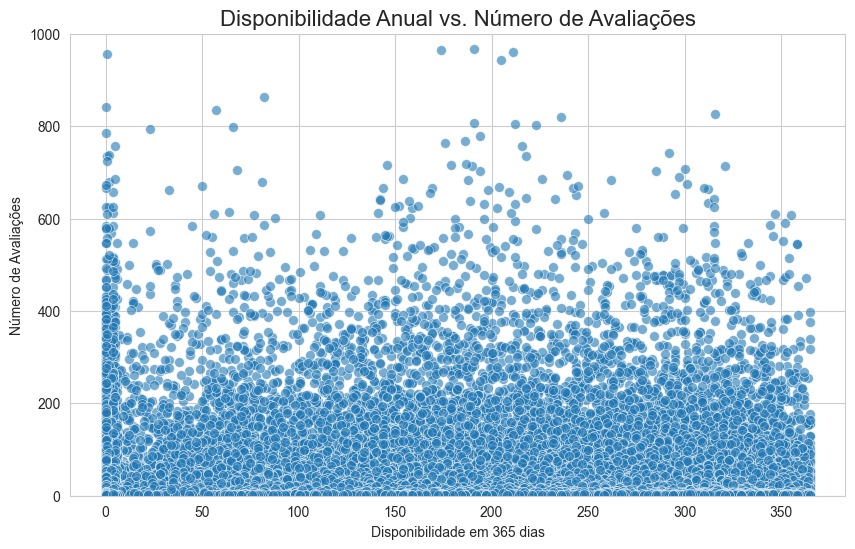

In [ ]:
# As duas variáveis a serem analisadas são: 'number_of_reviews' , 'availability_365'

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='availability_365', y='number_of_reviews', alpha=0.6, s=50)

plt.title('Disponibilidade Anual vs. Número de Avaliações', fontsize=16)
plt.xlabel('Disponibilidade em 365 dias')
plt.ylabel('Número de Avaliações')

plt.ylim(0, 1000)

plt.show()



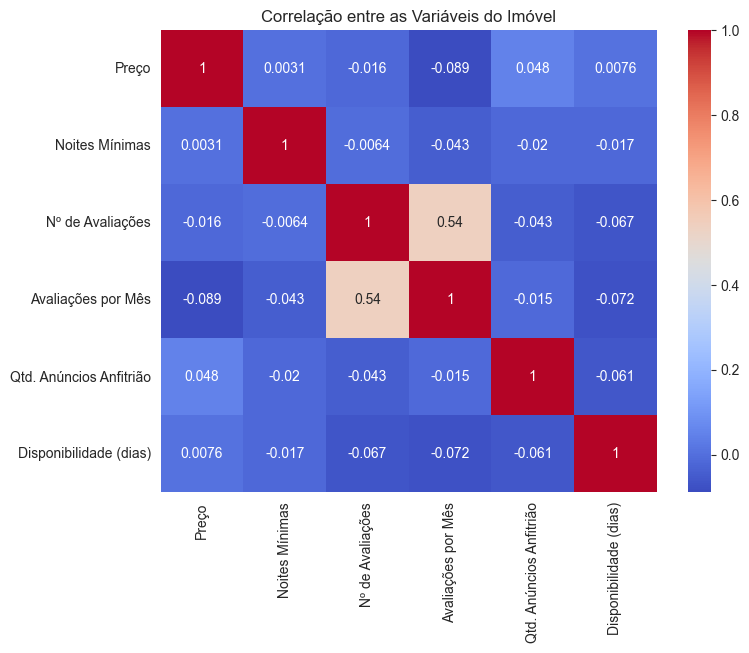

In [ ]:
# Gráfico de correlação entre as variáveis

colunas_para_correlacao = [
    'price', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count', 'availability_365'
]

traducoes_colunas = {
    'price': 'Preço',
    'minimum_nights': 'Noites Mínimas',
    'number_of_reviews': 'Nº de Avaliações',
    'reviews_per_month': 'Avaliações por Mês',
    'calculated_host_listings_count': 'Qtd. Anúncios Anfitrião',
    'availability_365': 'Disponibilidade (dias)'
}

df_selecionado = df[colunas_para_correlacao].rename(columns=traducoes_colunas)

df_corr = df_selecionado.corr()

plt.figure(figsize=(8, 6))

sns.heatmap(df_corr, annot=True, cmap='coolwarm')

plt.title('Correlação entre as Variáveis do Imóvel')

plt.show()

## 7 - Modelagem Estatística - Regressão Linear Simples

- Como variável independente optamos pela neighbourhood e a dividimos em categorias

### Ajustando a variável independente

In [ ]:
# Observandos os bairros existentes
df['neighbourhood'].value_counts()

neighbourhood
I Centro Storico              11523
VII San Giovanni/Cinecittà     2010
XIII Aurelia                   1690
II Parioli/Nomentano           1594
XII Monte Verde                1284
V Prenestino/Centocelle        1138
VIII Appia Antica               747
X Ostia/Acilia                  646
XIV Monte Mario                 504
XI Arvalia/Portuense            454
III Monte Sacro                 377
IV Tiburtina                    373
XV Cassia/Flaminia              318
IX Eur                          237
VI Roma delle Torri             179
Name: count, dtype: int64

In [ ]:
# Transformando a variável objeto em categórica  e depois a dividindo em categorias

# transformando a variável objeto em  categórica
df['neighbourhood'] = df['neighbourhood'].astype('category')

# atribuindo categorias as variáveis
df['neighbourhood_cat'] = df['neighbourhood'].cat.codes


# visualizando as 5 primeiras linhas
df[['neighbourhood', 'neighbourhood_cat']].head()

,neighbourhood,neighbourhood_cat
0,XII Monte Verde,11
1,XII Monte Verde,11
2,V Prenestino/Centocelle,5
3,VII San Giovanni/Cinecittà,7
4,I Centro Storico,0


### Regressão Linear Simples

$$
y_i = \beta_0 + \beta_1 \cdot x_i + ɛ_i,
$$

em que, $\beta_0 \in \mathbb{R}$ e $\beta_1 \in \mathbb{R}$, sendo:

- $y$: variável dependente (target, variável resposta, o que queremos prever);
- $x$: variável independente (feature ou covariável);
- $\beta_0$: intercepto (valor de $y$ quando $x = 0$);
- $\beta_1$: coeficiente angular (quanto $y$ varia a cada unidade de $x$);
- $ɛ$: termo de erro;


In [ ]:
# Selecionando a variável dependenete
y = df[['price']]

# Features, variável independente
X = df[['neighbourhood_cat']]

In [ ]:
# Separando os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size=0.3, random_state=42)

print(f'Tamanho da base de treino: {X_train.shape[0]}')
print(f'Tamanho da base de teste: {X_test.shape[0]}')

Tamanho da base de treino: 16151
Tamanho da base de teste: 6923


In [ ]:
# modelo
modelo_1 = LinearRegression()

# treino do modelo
modelo_1.fit(X_train, y_train)


LinearRegression()

In [ ]:
# predição do modelo
y_pred_test = modelo_1.predict(X_test[['neighbourhood_cat']])

# R² do modelo
r2 = r2_score(y_test, y_pred_test)

# R^2 ajustado
n = X_test.shape[0]
p =1
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Erro Médio Quadrático
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)


print('Resultados para a base de teste:')
print(f'R²: {r2:.4f}')
print(f'R² ajustado: {r2_adj:.4f}')
print(f'RMSE: {rmse:.4f}')

Resultados para a base de teste:
R²: 0.0919
R² ajustado: 0.0917
RMSE: 47.8773


### Gráfico de dispersão + linha de regressão

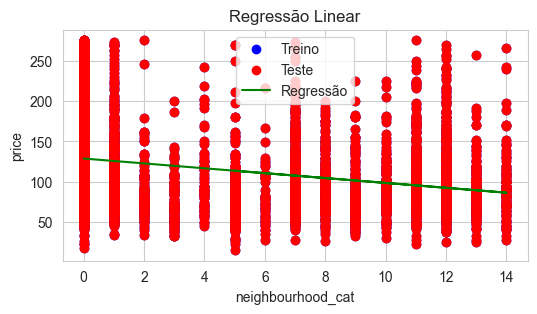

In [ ]:
plt.figure(figsize=(6,3))
plt.scatter(X_test['neighbourhood_cat'], y_test['price'], color='blue', label='Treino')
plt.scatter(X_test['neighbourhood_cat'], y_test['price'], color='red', label='Teste')
plt.plot(X_test['neighbourhood_cat'], modelo_1.predict(X_test), color='green', label='Regressão')
plt.legend()
plt.xlabel('neighbourhood_cat')
plt.ylabel('price')
plt.title('Regressão Linear')
plt.show()

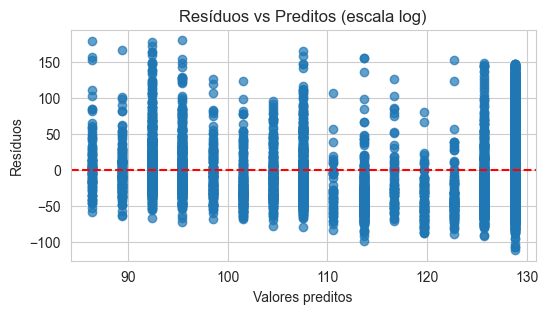

In [ ]:
residuos = y_test - y_pred_test

plt.figure(figsize=(6, 3))
plt.scatter(y_pred_test, residuos, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores preditos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Preditos (escala log)')
plt.show()

## 8 - Visualizações Avançadas

### Quantidade de quartos ao mês

In [ ]:
# Criando a variável mês da última avaliação

# passando para datetime
df["last_review"] = pd.to_datetime(df["last_review"])

# pegando o mês da última avaliação
df["month"] = df["last_review"].dt.month

In [ ]:
# Seleção da quantidade quartos e seus tipos disponíves por bairros ao mês - Data Frame Geral
qtd_quartos_bairro = df.groupby(["neighbourhood", "month", "room_type"]).size().reset_index(name='contagem')

# Exibição do Dataframe qtd_quartos_bairro
qtd_quartos_bairro

# Filtro que exclui o bairro I
qtd_quartos_bairro_semI = qtd_quartos_bairro[qtd_quartos_bairro['neighbourhood'] != 'I Centro Storico']

# Filtro que exclui o bairro I
qtd_quartos_bairroI = qtd_quartos_bairro[qtd_quartos_bairro['neighbourhood'] == 'I Centro Storico']

In [ ]:

fig_qtd_quartos_bairro = px.bar(
    qtd_quartos_bairro,             ## Data Frame da média da qtd de qurtos disporníveis por mÊs
    x="contagem",                   ## Eixo x representa a contagem da quantidade
    y="neighbourhood",              ## eixo y é os bairros
    color="room_type",              ## Diferencia os tipos de bairros por cores.
    animation_frame="month",        ## Cria uma animação ao longo do tempo.
    title="Qtd. de Quartos ao Mês ", ## Título do Gráfico
    width=600,                      ## Largura da figura em pixels
    height=500,                     ## Altura da figura em pixels
    range_x = [0, 2000]

)
fig_qtd_quartos_bairro.update_layout(showlegend=False)
fig_qtd_quartos_bairro.update_yaxes(title_text=None, automargin=True )
fig_qtd_quartos_bairro.show()

### Preço Médio dos Quartos ao Mês

In [ ]:
# Agrupamento por média de preço
media_preco = df.groupby(["neighbourhood", "month"])["price"].mean().reset_index()

# Exibindo os 5 primeiros registros
media_preco.head()

,neighbourhood,month,price
0,I Centro Storico,1,141.741650
1,I Centro Storico,2,129.890434
2,I Centro Storico,3,125.919297
3,I Centro Storico,4,155.825758
4,I Centro Storico,5,155.385892


In [ ]:
preco_temp = px.scatter(
    media_preco,             ## Data Frame da média de preços por região
    x="price",               ## Eixo x são os preços médios
    y="neighbourhood",       ## eixo y é os bairros
    color="neighbourhood",   ## Diferencia os bairros por cores.
    animation_frame="month", ## Cria uma animação ao longo do tempo.
    title="Preço Médio da Região por Mês", ## Título do Gráfico
    width=600,               ## Largura da figura em pixels
    height=500,              ## Altura da figura em pixels
    range_x= [50, 800]       ## Intervalo de valores do eixo X

)
preco_temp.update_layout(showlegend=False)
preco_temp.update_yaxes(title_text=None, automargin=True )
preco_temp.show()

## 9 - Conclusões

###
Uma análise do mercado de aluguéis por temporada em Roma, através dos dados do Airbnb, revela uma cidade de contrastes, com opções para diferentes perfis de viajantes e uma clara lógica por trás de seus preços.

A distribuição dos valores de aluguel mostra-se bastante particular. Observa-se que o preço apresenta uma distribuição assimétrica à direita, indicando uma forte concentração de acomodações com preços mais acessíveis, enquanto um número menor de imóveis de alto padrão eleva a média geral. Além disso, foi notado um comportamento sazonal ao longo do ano, com variações nos diferentes meses, sugerindo que a demanda flutua com as estações turísticas.

Os fatores que mais parecem influenciar o custo de uma estadia são a localização e o tipo de propriedade. Hospedar-se no histórico e pulsante "Centro Storico" representa um investimento maior, assim como a escolha de ter um apartamento inteiro à disposição em vez de um único quarto.

Um dos insights mais interessantes é a forma como os imóveis se concentram geograficamente. Há uma nítida aglomeração de anúncios ao redor dos principais pontos turísticos, um padrão que demonstra como a dinâmica do mercado está diretamente atrelada ao fluxo de viajantes e ao desejo de estar perto das grandes atrações da Cidade Eterna.

No entanto, a análise também encontrou suas limitações. Como todos os imóveis listados no DataFrame possuem IDs únicos, não foi possível utilizar registros repetidos para o preenchimento de valores faltantes, o que exigiu a remoção de certas entradas para garantir a qualidade dos dados.

Apesar da ampla quantidade de dados disponíveis, a Regressão Linear não se mostrou tão eficaz na previsão dos preços. Isso indica a necessidade de incorporar variáveis com maior correlação com o preço, de modo a tornar a análise mais robusta e os resultados mais representativos da complexa realidade do mercado imobiliário romano.
###